In [0]:
 !pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [0]:
!kaggle datasets download -d saisriteja/audiovisualdata

 97% 235M/243M [00:12<00:00, 23.2MB/s]
100% 243M/243M [00:12<00:00, 20.7MB/s]


In [0]:
!unzip /content/audiovisualdata.zip

Archive:  /content/audiovisualdata.zip
  inflating: AudioVisualClip/DC/a1.avi  
  inflating: AudioVisualClip/DC/a10.avi  
  inflating: AudioVisualClip/DC/a11.avi  
  inflating: AudioVisualClip/DC/a12.avi  
  inflating: AudioVisualClip/DC/a13.avi  
  inflating: AudioVisualClip/DC/a14.avi  
  inflating: AudioVisualClip/DC/a15.avi  
  inflating: AudioVisualClip/DC/a2.avi  
  inflating: AudioVisualClip/DC/a3.avi  
  inflating: AudioVisualClip/DC/a4.avi  
  inflating: AudioVisualClip/DC/a5.avi  
  inflating: AudioVisualClip/DC/a6.avi  
  inflating: AudioVisualClip/DC/a7.avi  
  inflating: AudioVisualClip/DC/a8.avi  
  inflating: AudioVisualClip/DC/a9.avi  
  inflating: AudioVisualClip/DC/d1.avi  
  inflating: AudioVisualClip/DC/d10.avi  
  inflating: AudioVisualClip/DC/d11.avi  
  inflating: AudioVisualClip/DC/d12.avi  
  inflating: AudioVisualClip/DC/d13.avi  
  inflating: AudioVisualClip/DC/d14.avi  
  inflating: AudioVisualClip/DC/d15.avi  
  inflating: AudioVisualClip/DC/d2.avi  
  infl

In [0]:
import os
sorted(os.listdir('/content/AudioVisualClip/DC'))

['a1.avi',
 'a10.avi',
 'a11.avi',
 'a12.avi',
 'a13.avi',
 'a14.avi',
 'a15.avi',
 'a2.avi',
 'a3.avi',
 'a4.avi',
 'a5.avi',
 'a6.avi',
 'a7.avi',
 'a8.avi',
 'a9.avi',
 'd1.avi',
 'd10.avi',
 'd11.avi',
 'd12.avi',
 'd13.avi',
 'd14.avi',
 'd15.avi',
 'd2.avi',
 'd3.avi',
 'd4.avi',
 'd5.avi',
 'd6.avi',
 'd7.avi',
 'd8.avi',
 'd9.avi',
 'f1.avi',
 'f10.avi',
 'f11.avi',
 'f12.avi',
 'f13.avi',
 'f14.avi',
 'f15.avi',
 'f2.avi',
 'f3.avi',
 'f4.avi',
 'f5.avi',
 'f6.avi',
 'f7.avi',
 'f8.avi',
 'f9.avi',
 'h1.avi',
 'h10.avi',
 'h11.avi',
 'h12.avi',
 'h13.avi',
 'h14.avi',
 'h15.avi',
 'h2.avi',
 'h3.avi',
 'h4.avi',
 'h5.avi',
 'h6.avi',
 'h7.avi',
 'h8.avi',
 'h9.avi',
 'n1.avi',
 'n10.avi',
 'n11.avi',
 'n12.avi',
 'n13.avi',
 'n14.avi',
 'n15.avi',
 'n16.avi',
 'n17.avi',
 'n18.avi',
 'n19.avi',
 'n2.avi',
 'n20.avi',
 'n21.avi',
 'n22.avi',
 'n23.avi',
 'n24.avi',
 'n25.avi',
 'n26.avi',
 'n27.avi',
 'n28.avi',
 'n29.avi',
 'n3.avi',
 'n30.avi',
 'n4.avi',
 'n5.avi',
 'n6.avi'

In [0]:
folders = ['DC','JE','JK','KL']


In [0]:
 testing = ['a14.avi','a15.avi','d14.avi','d15.avi', 'f14.avi','f15.avi',
            'h14.avi','h15.avi','n29.avi','n30.avi','sa14.avi','sa15.avi','su14.avi','su15.avi']

In [0]:
training = ['a'+str(i)+'.avi' for i in range(1,14)]
training.extend('d'+str(i)+'.avi' for i in range(1,14))
training.extend('f'+str(i)+'.avi' for i in range(1,14))
training.extend('h'+str(i)+'.avi' for i in range(1,14))
training.extend('sa'+str(i)+'.avi' for i in range(1,14))
training.extend('su'+str(i)+'.avi' for i in range(1,14))
training.extend('n'+str(i)+'.avi' for i in range(1,29))

In [0]:
len(training)

106

In [0]:
!git clone https://github.com/keyurr2/facial-landmarks.git #getting facial landmarks
!git clone https://github.com/AKSHAYUBHAT/TensorFace.git

Cloning into 'facial-landmarks'...
remote: Enumerating objects: 16, done.
remote: Total 16 (delta 0), reused 0 (delta 0), pack-reused 16
Unpacking objects: 100% (16/16), done.
Cloning into 'TensorFace'...
remote: Enumerating objects: 291, done.
remote: Total 291 (delta 0), reused 0 (delta 0), pack-reused 291
Receiving objects: 100% (291/291), 80.30 MiB | 32.72 MiB/s, done.
Resolving deltas: 100% (67/67), done.


In [0]:
import cv2
import numpy as np
import dlib
import cv2
import glob
from tqdm import tqdm 
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [0]:
import dlib
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("TensorFace/openface/models/dlib/shape_predictor_68_face_landmarks.dat")
def landmarks(frame):
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  faces = detector(gray)
  points = []
  for face in faces:
        x1 = face.left()
        y1 = face.top()
        x2 = face.right()
        y2 = face.bottom()
        #cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 3)

        landmarks = predictor(gray, face)

        for n in range(0, 68):
            x = landmarks.part(n).x
            y = landmarks.part(n).y
            points.append([x,y])
            cv2.circle(frame, (x, y), 4, (255, 0, 0), -1)
  return (np.array(frame),np.array(points))



a = ['a'+str(i)+'.avi' for i in range(30)]
d = ['d'+str(i)+'.avi' for i in range(30)]
ff = ['f'+str(i)+'.avi' for i in range(30)]
h = ['h'+str(i)+'.avi' for i in range(30)]
n = ['n'+str(i)+'.avi' for i in range(31)]
sa = ['sa'+str(i)+'.avi' for i in range(30)]
su = ['su'+str(i)+'.avi' for i in range(30)]

def slabel(file):
  s_file_n = file.split('/')
  s_name = s_file_n[-1]
  print(s_name)

  if s_name  in a:  
    return(0)
  
  elif s_name in d:
    return(1)

  elif s_name in ff:
    return(2)
  
  elif s_name in h:
    return(3)
  
  elif s_name in n:
    return(4)
  
  elif s_name in sa:
    return(5)
  
  elif s_name in su:
    return(6)



def tlabel(file):
  s_file_n = file.split('/')
  s_name = s_file_n[-1]
  #print(s_name)
  if s_name in training:
    return 0
  if s_name in testing:
    return 1


#label('/content/AudioVisualClip/DC/h10.avi')

def vidtoframes(videoFile):
 vidcap = cv2.VideoCapture(videoFile)
 success,image = vidcap.read()
 count = 0
 all_points = []
 file_frames = []
 #print(videoFile)
 l = slabel(videoFile)
 t = tlabel(videoFile)

 while success:
    img_source = image
    resized_image = cv2.resize(image, (28, 28))
    #sgray = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
    _,facial_landmarks = landmarks(img_source)
    all_points.append(facial_landmarks)
    file_frames.append(resized_image)
    success,image = vidcap.read()
    count += 1
    
    #print("l".center(10,'-'),l)
 return([np.array(file_frames),np.array(all_points),l,t])

def save_obj(obj, name ):
    with open( name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [0]:
f = '/content/AudioVisualClip/KL/f3.avi'
slabel(f)

f3.avi


2

In [0]:
SAVEE_data_training = []
SAVEE_data_testing = []
for file in tqdm(glob.glob('/content/AudioVisualClip/KL/*.avi')):
  simage,point,label,t = vidtoframes(file)
  #print(file)
  #print(label)
  #print('------------------')
  if t == 0:
    SAVEE_data_training.append([simage,point,label])
  if t == 1:
    SAVEE_data_testing.append([simage,point,label])






  0%|          | 0/120 [00:00<?, ?it/s]

n30.avi







  1%|          | 1/120 [00:03<06:29,  3.27s/it]

d12.avi







  2%|▏         | 2/120 [00:05<05:44,  2.92s/it]

sa15.avi







  2%|▎         | 3/120 [00:10<06:46,  3.48s/it]

a5.avi







  3%|▎         | 4/120 [00:12<06:17,  3.25s/it]

n26.avi







  4%|▍         | 5/120 [00:15<05:38,  2.94s/it]

n7.avi







  5%|▌         | 6/120 [00:18<05:52,  3.09s/it]

a8.avi







  6%|▌         | 7/120 [00:21<05:40,  3.02s/it]

h12.avi







  7%|▋         | 8/120 [00:25<06:23,  3.43s/it]

n22.avi







  8%|▊         | 9/120 [00:27<05:40,  3.07s/it]

n12.avi







  8%|▊         | 10/120 [00:30<05:15,  2.87s/it]

f13.avi







  9%|▉         | 11/120 [00:32<04:53,  2.70s/it]

h2.avi







 10%|█         | 12/120 [00:34<04:34,  2.54s/it]

f7.avi







 11%|█         | 13/120 [00:37<04:42,  2.64s/it]

n13.avi







 12%|█▏        | 14/120 [00:39<04:24,  2.50s/it]

su10.avi







 12%|█▎        | 15/120 [00:42<04:32,  2.60s/it]

n17.avi







 13%|█▎        | 16/120 [00:45<04:19,  2.50s/it]

sa1.avi







 14%|█▍        | 17/120 [00:48<04:44,  2.76s/it]

n10.avi







 15%|█▌        | 18/120 [00:51<04:50,  2.85s/it]

d8.avi







 16%|█▌        | 19/120 [00:54<04:49,  2.87s/it]

d6.avi







 17%|█▋        | 20/120 [00:56<04:35,  2.76s/it]

f5.avi







 18%|█▊        | 21/120 [00:59<04:38,  2.81s/it]

su3.avi







 18%|█▊        | 22/120 [01:01<03:58,  2.44s/it]

a1.avi







 19%|█▉        | 23/120 [01:04<04:29,  2.78s/it]

su2.avi







 20%|██        | 24/120 [01:07<04:22,  2.74s/it]

su8.avi







 21%|██        | 25/120 [01:10<04:33,  2.88s/it]

a3.avi







 22%|██▏       | 26/120 [01:12<03:53,  2.49s/it]

n20.avi







 22%|██▎       | 27/120 [01:14<03:52,  2.50s/it]

n14.avi







 23%|██▎       | 28/120 [01:19<04:44,  3.09s/it]

h9.avi







 24%|██▍       | 29/120 [01:22<04:31,  2.98s/it]

su9.avi







 25%|██▌       | 30/120 [01:24<04:14,  2.83s/it]

a6.avi







 26%|██▌       | 31/120 [01:27<04:08,  2.79s/it]

d14.avi







 27%|██▋       | 32/120 [01:31<04:38,  3.17s/it]

sa7.avi







 28%|██▊       | 33/120 [01:33<04:04,  2.82s/it]

d7.avi







 28%|██▊       | 34/120 [01:35<03:34,  2.49s/it]

su5.avi







 29%|██▉       | 35/120 [01:37<03:26,  2.43s/it]

sa11.avi







 30%|███       | 36/120 [01:42<04:28,  3.20s/it]

h4.avi







 31%|███       | 37/120 [01:44<04:05,  2.96s/it]

h14.avi







 32%|███▏      | 38/120 [01:48<04:31,  3.31s/it]

n2.avi







 32%|███▎      | 39/120 [01:51<04:02,  2.99s/it]

h6.avi







 33%|███▎      | 40/120 [01:53<03:52,  2.91s/it]

sa6.avi







 34%|███▍      | 41/120 [01:56<03:54,  2.97s/it]

n21.avi







 35%|███▌      | 42/120 [01:59<03:51,  2.96s/it]

a12.avi







 36%|███▌      | 43/120 [02:02<03:42,  2.89s/it]

f4.avi







 37%|███▋      | 44/120 [02:05<03:33,  2.81s/it]

h10.avi







 38%|███▊      | 45/120 [02:07<03:23,  2.72s/it]

f2.avi







 38%|███▊      | 46/120 [02:10<03:14,  2.63s/it]

su11.avi







 39%|███▉      | 47/120 [02:12<02:56,  2.42s/it]

n28.avi







 40%|████      | 48/120 [02:15<03:16,  2.72s/it]

h5.avi







 41%|████      | 49/120 [02:18<03:20,  2.83s/it]

h13.avi







 42%|████▏     | 50/120 [02:20<03:03,  2.62s/it]

d15.avi







 42%|████▎     | 51/120 [02:25<03:48,  3.31s/it]

d5.avi







 43%|████▎     | 52/120 [02:28<03:32,  3.12s/it]

f1.avi







 44%|████▍     | 53/120 [02:31<03:38,  3.26s/it]

n19.avi







 45%|████▌     | 54/120 [02:34<03:20,  3.04s/it]

n27.avi







 46%|████▌     | 55/120 [02:38<03:31,  3.25s/it]

sa10.avi







 47%|████▋     | 56/120 [02:41<03:37,  3.39s/it]

su1.avi







 48%|████▊     | 57/120 [02:45<03:30,  3.35s/it]

f12.avi







 48%|████▊     | 58/120 [02:49<03:41,  3.58s/it]

n15.avi







 49%|████▉     | 59/120 [02:53<03:41,  3.64s/it]

h1.avi







 50%|█████     | 60/120 [02:56<03:31,  3.52s/it]

f10.avi







 51%|█████     | 61/120 [02:58<03:03,  3.11s/it]

n18.avi







 52%|█████▏    | 62/120 [03:00<02:35,  2.68s/it]

sa4.avi







 52%|█████▎    | 63/120 [03:04<02:59,  3.14s/it]

a9.avi







 53%|█████▎    | 64/120 [03:07<02:53,  3.10s/it]

n5.avi







 54%|█████▍    | 65/120 [03:09<02:38,  2.88s/it]

d11.avi







 55%|█████▌    | 66/120 [03:12<02:34,  2.87s/it]

n11.avi







 56%|█████▌    | 67/120 [03:17<03:03,  3.46s/it]

h8.avi







 57%|█████▋    | 68/120 [03:19<02:36,  3.00s/it]

d3.avi







 57%|█████▊    | 69/120 [03:20<02:12,  2.61s/it]

n9.avi







 58%|█████▊    | 70/120 [03:24<02:16,  2.73s/it]

a13.avi







 59%|█████▉    | 71/120 [03:28<02:34,  3.16s/it]

su7.avi







 60%|██████    | 72/120 [03:30<02:24,  3.01s/it]

a10.avi







 61%|██████    | 73/120 [03:34<02:28,  3.15s/it]

f8.avi







 62%|██████▏   | 74/120 [03:37<02:31,  3.29s/it]

su4.avi







 62%|██████▎   | 75/120 [03:40<02:21,  3.15s/it]

sa9.avi







 63%|██████▎   | 76/120 [03:43<02:07,  2.91s/it]

su15.avi







 64%|██████▍   | 77/120 [03:48<02:37,  3.67s/it]

d2.avi







 65%|██████▌   | 78/120 [03:51<02:20,  3.34s/it]

a14.avi







 66%|██████▌   | 79/120 [03:55<02:30,  3.66s/it]

d4.avi







 67%|██████▋   | 80/120 [03:58<02:19,  3.50s/it]

f11.avi







 68%|██████▊   | 81/120 [04:02<02:22,  3.64s/it]

h3.avi







 68%|██████▊   | 82/120 [04:04<01:53,  3.00s/it]

n8.avi







 69%|██████▉   | 83/120 [04:07<01:50,  2.98s/it]

n1.avi







 70%|███████   | 84/120 [04:10<01:49,  3.05s/it]

n29.avi







 71%|███████   | 85/120 [04:12<01:40,  2.88s/it]

n3.avi







 72%|███████▏  | 86/120 [04:14<01:23,  2.46s/it]

f3.avi







 72%|███████▎  | 87/120 [04:15<01:12,  2.21s/it]

sa13.avi







 73%|███████▎  | 88/120 [04:20<01:34,  2.94s/it]

a4.avi







 74%|███████▍  | 89/120 [04:22<01:26,  2.80s/it]

su12.avi







 75%|███████▌  | 90/120 [04:26<01:31,  3.06s/it]

h15.avi







 76%|███████▌  | 91/120 [04:31<01:43,  3.58s/it]

a2.avi







 77%|███████▋  | 92/120 [04:33<01:28,  3.17s/it]

n24.avi







 78%|███████▊  | 93/120 [04:36<01:21,  3.01s/it]

a15.avi







 78%|███████▊  | 94/120 [04:39<01:22,  3.17s/it]

sa8.avi







 79%|███████▉  | 95/120 [04:42<01:13,  2.95s/it]

f6.avi







 80%|████████  | 96/120 [04:44<01:06,  2.75s/it]

f14.avi







 81%|████████  | 97/120 [04:48<01:08,  2.99s/it]

n25.avi







 82%|████████▏ | 98/120 [04:50<01:04,  2.94s/it]

d9.avi







 82%|████████▎ | 99/120 [04:54<01:04,  3.09s/it]

sa5.avi







 83%|████████▎ | 100/120 [04:58<01:06,  3.31s/it]

su14.avi







 84%|████████▍ | 101/120 [05:03<01:11,  3.77s/it]

f15.avi







 85%|████████▌ | 102/120 [05:07<01:10,  3.93s/it]

d1.avi







 86%|████████▌ | 103/120 [05:10<01:03,  3.75s/it]

n4.avi







 87%|████████▋ | 104/120 [05:13<00:55,  3.45s/it]

sa14.avi







 88%|████████▊ | 105/120 [05:18<00:57,  3.81s/it]

a11.avi







 88%|████████▊ | 106/120 [05:20<00:46,  3.32s/it]

sa2.avi







 89%|████████▉ | 107/120 [05:22<00:39,  3.05s/it]

a7.avi







 90%|█████████ | 108/120 [05:24<00:31,  2.64s/it]

su13.avi







 91%|█████████ | 109/120 [05:27<00:30,  2.81s/it]

h11.avi







 92%|█████████▏| 110/120 [05:32<00:34,  3.46s/it]

n6.avi







 92%|█████████▎| 111/120 [05:35<00:29,  3.30s/it]

n23.avi







 93%|█████████▎| 112/120 [05:37<00:24,  3.02s/it]

h7.avi







 94%|█████████▍| 113/120 [05:40<00:20,  2.90s/it]

sa3.avi







 95%|█████████▌| 114/120 [05:41<00:15,  2.50s/it]

d13.avi







 96%|█████████▌| 115/120 [05:45<00:14,  2.93s/it]

d10.avi







 97%|█████████▋| 116/120 [05:48<00:11,  2.97s/it]

su6.avi







 98%|█████████▊| 117/120 [05:51<00:08,  2.76s/it]

f9.avi







 98%|█████████▊| 118/120 [05:54<00:05,  2.83s/it]

n16.avi







 99%|█████████▉| 119/120 [05:57<00:03,  3.01s/it]

sa12.avi







100%|██████████| 120/120 [06:01<00:00,  3.01s/it]


In [0]:
SAVEE_data_training = np.array(SAVEE_data_training)
SAVEE_data_testing = np.array(SAVEE_data_testing)
print(SAVEE_data_training.shape)
print(SAVEE_data_testing.shape)

(106, 3)
(14, 3)


In [0]:
def imginp(a):
  con = []
  for i in a:
    con.extend(i)
  return con

In [0]:
from keras.layers import Conv3D, MaxPool3D, Flatten, Dense
from keras.layers import Dropout, Input, BatchNormalization
from sklearn.metrics import confusion_matrix, accuracy_score
from plotly.offline import iplot, init_notebook_mode
from keras.losses import categorical_crossentropy
from keras.optimizers import Adadelta
import plotly.graph_objs as go
from matplotlib.pyplot import cm
from keras.models import Model
import numpy as np
import keras
import h5py
from keras.models import Sequential
init_notebook_mode(connected=True)
%matplotlib inline

In [0]:
train_imgs = []
train_landm = []
train_label = []

test_imgs = []
test_landm = []
test_label = []

for i,j,k in SAVEE_data_training:
  train_imgs.append(i)
  train_landm.append(j)
  train_label.append(k)

for i,j,k in SAVEE_data_testing:
  test_imgs.append(i)
  test_landm.append(j)
  test_label.append(k)

In [0]:
train_imgs = np.array(train_imgs)
test_imgs= np.array(test_imgs)

X = np.concatenate((train_imgs, test_imgs), axis=0)

In [0]:
X_min = 1000
for i in X:
  m = i.shape[0]
  #print(m)

  if m < X_min:
    X_min = m
print(X_min)

98


In [0]:
def framegene(X):
  X_ref = []

  no = X_min
  for i in X:
    length = i.shape[0]
    if length>no:
        frame_length = int((length-no)/2)
        X_ref.append((i[frame_length:frame_length+no]))
    else:
        X_ref.append(i)
  return np.array(X_ref)

In [0]:
X_train = framegene(train_imgs)
X_test = framegene(test_imgs)

In [0]:
print(X_train.shape)
print(X_test.shape)

(106, 98, 28, 28, 3)
(14, 98, 28, 28, 3)


In [0]:
y_train = np.array(train_label)
y_test = np.array(test_label)

print(y_train.shape)
print(y_test.shape)

(106,)
(14,)


In [0]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = #train_test_split(X_ref, y, test_size=0.3, random_state=42)



In [0]:
y_test

array([4, 5, 1, 3, 1, 6, 0, 4, 3, 0, 2, 6, 2, 5])

In [0]:
y_train

array([1, 0, 4, 4, 0, 3, 4, 4, 2, 3, 2, 4, 6, 4, 5, 4, 1, 1, 2, 6, 0, 6,
       6, 0, 4, 4, 3, 6, 0, 5, 1, 6, 5, 3, 4, 3, 5, 4, 0, 2, 3, 2, 6, 4,
       3, 3, 1, 2, 4, 4, 5, 6, 2, 4, 3, 2, 4, 5, 0, 4, 1, 4, 3, 1, 4, 0,
       6, 0, 2, 6, 5, 1, 1, 2, 3, 4, 4, 4, 2, 5, 0, 6, 0, 4, 5, 2, 4, 1,
       5, 1, 4, 0, 5, 0, 6, 3, 4, 4, 3, 5, 1, 1, 6, 2, 4, 5])

In [0]:
y_train = keras.utils.to_categorical(y_train, 7)
y_test = keras.utils.to_categorical(y_test, 7)

In [0]:
## input layer
input_layer = Input((X_min, 28, 28, 3))

## convolutional layers
conv_layer1 = Conv3D(filters=8, kernel_size=(3, 3, 3), activation='relu')(input_layer)
conv_layer2 = Conv3D(filters=16, kernel_size=(3, 3, 3), activation='relu')(conv_layer1)

## add max pooling to obtain the most imformatic features
pooling_layer1 = MaxPool3D(pool_size=(2, 2, 2))(conv_layer2)

conv_layer3 = Conv3D(filters=32, kernel_size=(3, 3, 3), activation='relu')(pooling_layer1)
conv_layer4 = Conv3D(filters=64, kernel_size=(3, 3, 3), activation='relu')(conv_layer3)
pooling_layer2 = MaxPool3D(pool_size=(2, 2, 2))(conv_layer4)

## perform batch normalization on the convolution outputs before feeding it to MLP architecture
pooling_layer2 = BatchNormalization()(pooling_layer2)
flatten_layer = Flatten()(pooling_layer2)

## create an MLP architecture with dense layers : 4096 -> 512 -> 10
## add dropouts to avoid overfitting / perform regularization
dense_layer1 = Dense(units=2048, activation='relu')(flatten_layer)
dense_layer1 = Dropout(0.4)(dense_layer1)
dense_layer2 = Dense(units=512, activation='relu')(dense_layer1)
dense_layer2 = Dropout(0.4)(dense_layer2)
output_layer = Dense(units=7, activation='softmax')(dense_layer2)

## define the model with input layer and output layer
model = Model(inputs=input_layer, outputs=output_layer)

In [0]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 98, 28, 28, 3)     0         
_________________________________________________________________
conv3d_5 (Conv3D)            (None, 96, 26, 26, 8)     656       
_________________________________________________________________
conv3d_6 (Conv3D)            (None, 94, 24, 24, 16)    3472      
_________________________________________________________________
max_pooling3d_3 (MaxPooling3 (None, 47, 12, 12, 16)    0         
_________________________________________________________________
conv3d_7 (Conv3D)            (None, 45, 10, 10, 32)    13856     
_________________________________________________________________
conv3d_8 (Conv3D)            (None, 43, 8, 8, 64)      55360     
_________________________________________________________________
max_pooling3d_4 (MaxPooling3 (None, 21, 4, 4, 64)      0   

In [0]:
from keras.callbacks import EarlyStopping

model.compile(loss=categorical_crossentropy, optimizer=Adadelta(lr=0.1), metrics=['acc'])
es = EarlyStopping(monitor='val_loss',verbose =1, patience=50)

history = model.fit(x=X_train, y=y_train, batch_size=4, epochs=50,verbose=0, validation_split=0.2,callbacks=[es])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where










Train: 1.000, Test: 0.929


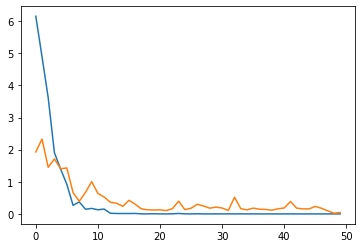

In [0]:
import matplotlib.pyplot as plt
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')

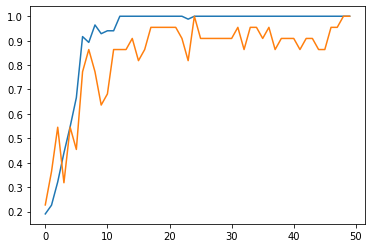

In [0]:
plt.plot(history.history['acc'],label = 'acc')
plt.plot(history.history['val_acc'],label = 'val_acc')

In [0]:
y_test.argmax(axis=1)

array([4, 5, 1, 3, 1, 6, 0, 4, 3, 0, 2, 6, 2, 5])

In [0]:
y_pred = model.predict(X_test)
y_pred.argmax(axis=1)

array([4, 5, 1, 3, 2, 6, 0, 4, 3, 0, 2, 6, 2, 5])

In [0]:
#y_pred = keras.utils.to_categorical(pred, 7)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

array([[2, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 0, 0, 0],
       [0, 0, 2, 0, 0, 0, 0],
       [0, 0, 0, 2, 0, 0, 0],
       [0, 0, 0, 0, 2, 0, 0],
       [0, 0, 0, 0, 0, 2, 0],
       [0, 0, 0, 0, 0, 0, 2]])

In [0]:
#from sklearn.metrics import plot_confusion_matrix
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('int') / cm.sum(axis=1)[:, np.newaxis]
        print(cm)


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.1f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

[[1.  0.  0.  0.  0.  0.  0. ]
 [0.  0.5 0.5 0.  0.  0.  0. ]
 [0.  0.  1.  0.  0.  0.  0. ]
 [0.  0.  0.  1.  0.  0.  0. ]
 [0.  0.  0.  0.  1.  0.  0. ]
 [0.  0.  0.  0.  0.  1.  0. ]
 [0.  0.  0.  0.  0.  0.  1. ]]


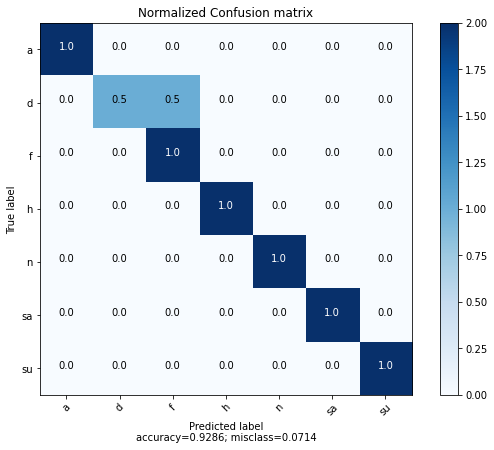

In [0]:
#from sklearn.metrics import plot_confusion_matrix
target_names = ['a','d','f','h','n','sa','su']
cm =confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

plot_confusion_matrix(cm,target_names,title='Normalized Confusion matrix',cmap=None,normalize=True)